In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import tensorflow as tf

In [69]:
from sklearn.metrics import mean_squared_error

In [3]:
df_orig = pd.read_csv('./datasets/city_day.csv')

In [4]:
df_orig.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df_orig['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [6]:
df_orig = df_orig.query('City == "Chennai"')

In [7]:
df_orig = df_orig.drop(['City', 'Date'], axis = 1).reset_index(drop = True)

In [8]:
df_orig.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
1,NaN,NaN,16.49,13.42,23.09,7.83,1.23,8.61,9.16,0.13,NaN,NaN,NaN,NaN
2,NaN,NaN,9.72,19.56,9.99,4.63,0.77,48.23,13.45,0.03,NaN,NaN,NaN,NaN
3,NaN,NaN,9.60,16.20,11.71,5.23,1.00,27.96,10.33,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9.16,16.30,12.94,5.50,0.90,16.60,9.36,NaN,NaN,NaN,NaN,NaN


In [9]:
df_orig.shape

(2009, 14)

In [10]:
df_orig.isna().sum()


PM2.5          117
PM10          1707
NO              36
NO2             36
NOx             36
NH3            462
CO              25
SO2             36
O3              49
Benzene        285
Toluene        253
Xylene        2009
AQI            125
AQI_Bucket     125
dtype: int64

In [11]:
df_orig.drop(['Xylene'], inplace = True, axis = 1)

In [12]:
df_orig

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
1,NaN,NaN,16.49,13.42,23.09,7.83,1.23,8.61,9.16,0.13,NaN,NaN,NaN
2,NaN,NaN,9.72,19.56,9.99,4.63,0.77,48.23,13.45,0.03,NaN,NaN,NaN
3,NaN,NaN,9.60,16.20,11.71,5.23,1.00,27.96,10.33,NaN,NaN,NaN,NaN
4,NaN,NaN,9.16,16.30,12.94,5.50,0.90,16.60,9.36,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,26.42,39.30,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.10,0.07,95.0,Satisfactory
2005,25.93,45.54,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.09,0.00,98.0,Satisfactory
2006,21.30,22.21,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.09,0.01,104.0,Moderate
2007,24.14,30.66,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.17,0.16,110.0,Moderate


In [13]:
df_orig.dropna(subset=['AQI'], inplace = True)

In [14]:
df_orig.isna().sum()

PM2.5            6
PM10          1582
NO               6
NO2              6
NOx              6
NH3            427
CO               5
SO2              6
O3              18
Benzene        204
Toluene        178
AQI              0
AQI_Bucket       0
dtype: int64

In [15]:
df_orig.shape

(1884, 13)

In [16]:
df_orig.corr(numeric_only = True)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.385231,0.127251,0.223786,0.034335,0.102498,0.041947,0.144770,0.108189,0.012159,0.079852,0.685568
PM10,0.385231,1.000000,0.041308,-0.045340,-0.008916,0.053242,0.030147,0.042268,0.011705,0.005327,-0.008690,0.368481
NO,0.127251,0.041308,1.000000,0.617305,0.558766,-0.094765,0.238024,0.183316,-0.134157,-0.003754,0.069963,0.111503
NO2,0.223786,-0.045340,0.617305,1.000000,0.526142,0.053177,0.150967,0.122025,-0.035406,-0.012613,0.045106,0.195012
NOx,0.034335,-0.008916,0.558766,0.526142,1.000000,-0.087911,0.055753,0.226742,-0.087956,-0.020801,0.035807,0.020316
NH3,0.102498,0.053242,-0.094765,0.053177,-0.087911,1.000000,-0.103564,0.015468,0.010435,-0.019443,0.002480,0.031652
CO,0.041947,0.030147,0.238024,0.150967,0.055753,-0.103564,1.000000,0.060611,-0.097997,0.075022,0.134194,0.354400
SO2,0.144770,0.042268,0.183316,0.122025,0.226742,0.015468,0.060611,1.000000,-0.000606,0.048061,0.013821,0.090230
O3,0.108189,0.011705,-0.134157,-0.035406,-0.087956,0.010435,-0.097997,-0.000606,1.000000,-0.024778,0.000359,0.169697
Benzene,0.012159,0.005327,-0.003754,-0.012613,-0.020801,-0.019443,0.075022,0.048061,-0.024778,1.000000,0.143966,0.028122


In [17]:
num_keys = list(df_orig.keys())
cat_keys = num_keys.pop()

In [24]:
num_keys

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'AQI']

In [25]:
cat_keys

'AQI_Bucket'

In [26]:
imp = KNNImputer(n_neighbors = 2)

df_orig_num = df_orig[num_keys]
df_orig_cat = df_orig[cat_keys]

df_orig_num = pd.DataFrame(imp.fit_transform(df_orig_num), columns= num_keys)
df_orig = df_orig_num
df_orig[cat_keys] = df_orig_cat

In [27]:
df_orig.corr(numeric_only =True)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.485282,0.126777,0.223670,0.034340,0.102259,0.041506,0.143782,0.106966,-0.013336,0.078818,0.685660
PM10,0.485282,1.000000,0.028793,0.044761,-0.067853,0.020669,0.130733,0.032137,0.128347,-0.001206,0.041720,0.551063
NO,0.126777,0.028793,1.000000,0.617521,0.559102,-0.127206,0.238420,0.183756,-0.141547,0.008570,0.054115,0.111733
NO2,0.223670,0.044761,0.617521,1.000000,0.526530,0.024471,0.150677,0.122368,-0.044730,-0.022512,0.033702,0.195395
NOx,0.034340,-0.067853,0.559102,0.526530,1.000000,-0.144725,0.055971,0.227322,-0.084600,-0.016784,0.031953,0.020895
NH3,0.102259,0.020669,-0.127206,0.024471,-0.144725,1.000000,-0.137416,-0.001758,0.050389,-0.054544,-0.027953,0.019966
CO,0.041506,0.130733,0.238420,0.150677,0.055971,-0.137416,1.000000,0.061747,-0.106319,0.077144,0.102350,0.354104
SO2,0.143782,0.032137,0.183756,0.122368,0.227322,-0.001758,0.061747,1.000000,0.001005,0.072306,0.025247,0.089884
O3,0.106966,0.128347,-0.141547,-0.044730,-0.084600,0.050389,-0.106319,0.001005,1.000000,-0.047986,0.025315,0.169504
Benzene,-0.013336,-0.001206,0.008570,-0.022512,-0.016784,-0.054544,0.077144,0.072306,-0.047986,1.000000,0.107480,0.011736


In [28]:
df_orig.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,149.04,196.33,31.23,112.29,12.77,9.68,0.93,14.04,38.67,0.120,8.39,333.0,NaN
1,140.21,196.33,16.83,31.79,25.73,10.91,1.41,11.94,44.52,0.530,8.02,318.0,NaN
2,266.29,196.33,39.96,50.12,20.48,11.51,1.27,25.45,27.64,0.220,8.35,408.0,NaN
3,88.65,196.33,22.83,38.75,20.64,10.97,2.21,11.76,27.68,1.675,6.41,448.0,NaN
4,51.69,176.65,37.45,46.48,16.09,11.41,1.23,6.53,27.62,0.535,6.94,312.0,NaN


<Axes: xlabel='PM2.5', ylabel='AQI'>

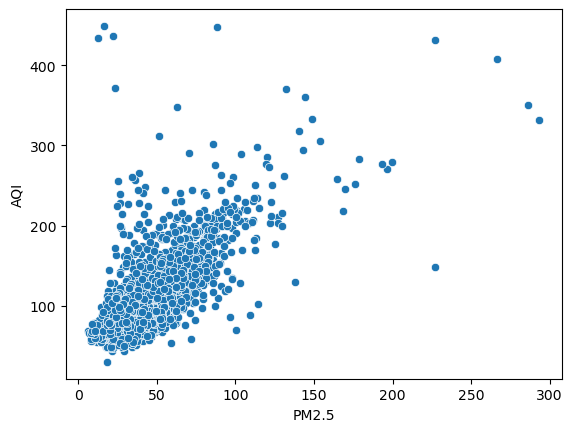

In [29]:
sns.scatterplot(data = df_orig, x = 'PM2.5', y = 'AQI')



<Axes: xlabel='PM10', ylabel='AQI'>

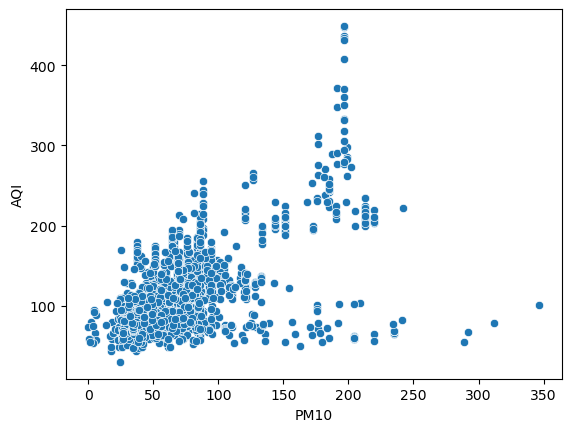

In [30]:
sns.scatterplot(data = df_orig, x = 'PM10', y = 'AQI')

<Axes: xlabel='NO', ylabel='AQI'>

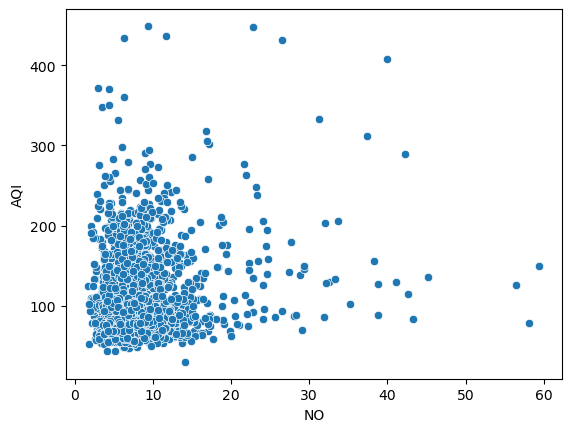

In [31]:
sns.scatterplot(data = df_orig, x = 'NO', y = 'AQI')

<Axes: xlabel='NO', ylabel='AQI'>

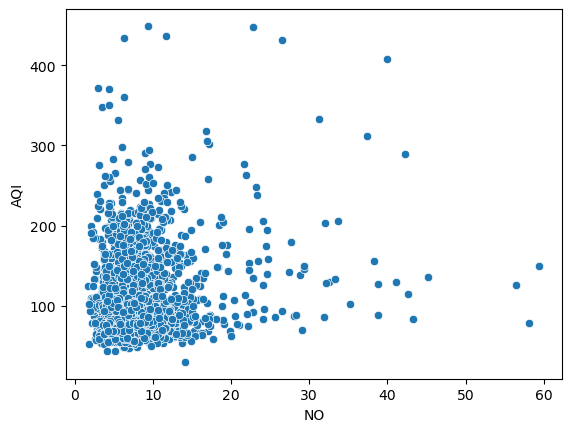

In [26]:
sns.scatterplot(x = df_orig['NO'], y = df_orig['AQI'])

<Axes: xlabel='O3', ylabel='AQI'>

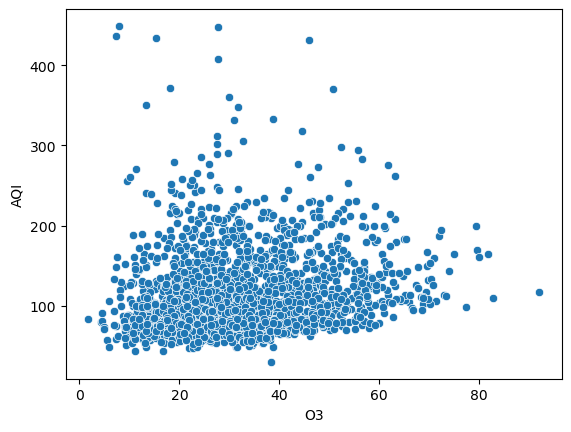

In [32]:
sns.scatterplot(x = df_orig['O3'], y = df_orig['AQI'])

<Axes: xlabel='AQI_Bucket', ylabel='AQI'>

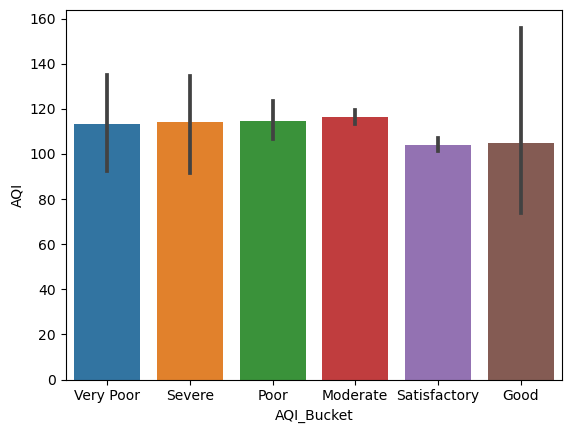

In [33]:
sns.barplot(x = df_orig['AQI_Bucket'], y = df_orig['AQI'])

In [34]:
means = df_orig.mean(numeric_only = True)
sds = df_orig.std(numeric_only = True)

In [35]:
means

PM2.5       50.144575
PM10        75.894814
NO           8.760058
NO2         16.539650
NOx         17.839095
NH3         69.386388
CO           1.019265
SO2          7.777070
O3          32.338432
Benzene      2.317269
Toluene      2.735918
AQI        114.502654
dtype: float64

In [37]:
sds

PM2.5      26.036637
PM10       43.535784
NO          5.210500
NO2         7.488270
NOx         7.281772
NH3        54.822869
CO          1.243612
SO2         4.721819
O3         14.204541
Benzene    14.933318
Toluene     9.537829
AQI        51.967099
dtype: float64

In [153]:
class Model:
    def __init__(self, epochs = 100, learning_rate = 0.001, num_layers = 8, num_units = 32):
        self.model = None
        self.standard_params = None
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.num_features = 0
        self.num_layers = num_layers
        self.num_units = num_units
        self.loss_fn = None
        self.optimizer = None
        
    def _standard_scaler(self, data):
        if self.standard_params is None:
            mean = np.mean(data, axis = 0)
            std = np.std(data, axis = 0)
            self.standard_params = {'mean': mean, 'std': std}
        
        result = (data - self.standard_params['mean']) / (self.standard_params['std'])
        return result
    
    def fit(self, X, y, print_loss = False):
        X = self._standard_scaler(X)
        y = y.reshape(-1, 1)
        
        self.num_features = X.shape[1]
        
        self.loss_fn = tf.keras.losses.MeanSquaredError()
        self.optimizer = tf.keras.optimizers.Adam(learning_rate = self.learning_rate)
        
        history = []
        
        self.model = tf.keras.Sequential()
        
        self.model.add(tf.keras.Input(shape = (self.num_features,)))
        
        for _ in range(self.num_layers):
            self.model.add(tf.keras.layers.Dense(self.num_units, activation = 'relu'))
        
        self.model.add(tf.keras.layers.Dense(1, activation = 'linear'))
        
        
        
        for epoch in range(self.epochs):
            with tf.GradientTape() as tape:
                predictions = self.model(X)
                loss_value = self.loss_fn(y, predictions)
            
            grads = tape.gradient(loss_value, self.model.trainable_variables)
            self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
            
            history.append(loss_value)
            
            if epoch % 10 == 0 and print_loss:
                print(f'Ephoch { epoch + 1 }, Loss: { loss_value }')
            
        return history, self.epochs
    
    def predict(self, X):
        X = self._standard_scaler(X)
        
        y = self.model(X).numpy()
        
        return y

In [54]:
model = Model()

In [35]:
df_orig.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,149.04,196.33,31.23,112.29,12.77,9.68,0.93,14.04,38.67,0.120,8.39,333.0,NaN
1,140.21,196.33,16.83,31.79,25.73,10.91,1.41,11.94,44.52,0.530,8.02,318.0,NaN
2,266.29,196.33,39.96,50.12,20.48,11.51,1.27,25.45,27.64,0.220,8.35,408.0,NaN
3,88.65,196.33,22.83,38.75,20.64,10.97,2.21,11.76,27.68,1.675,6.41,448.0,NaN
4,51.69,176.65,37.45,46.48,16.09,11.41,1.23,6.53,27.62,0.535,6.94,312.0,NaN


In [36]:
df_non_cat = df_orig.drop(['AQI_Bucket'], axis = 1)

In [37]:
df_non_cat

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,149.04,196.33,31.23,112.29,12.77,9.68,0.93,14.04,38.67,0.120,8.39,333.0
1,140.21,196.33,16.83,31.79,25.73,10.91,1.41,11.94,44.52,0.530,8.02,318.0
2,266.29,196.33,39.96,50.12,20.48,11.51,1.27,25.45,27.64,0.220,8.35,408.0
3,88.65,196.33,22.83,38.75,20.64,10.97,2.21,11.76,27.68,1.675,6.41,448.0
4,51.69,176.65,37.45,46.48,16.09,11.41,1.23,6.53,27.62,0.535,6.94,312.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,26.42,39.30,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.100,0.07,95.0
1880,25.93,45.54,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.090,0.00,98.0
1881,21.30,22.21,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.090,0.01,104.0
1882,24.14,30.66,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.170,0.16,110.0


In [38]:
num_keys

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'AQI']

In [39]:
y = df_orig[num_keys.pop()].values

X = df_orig[num_keys].values

num_keys.append('AQI')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [44]:
X_train.shape, X_test.shape

((1413, 11), (471, 11))

In [45]:
y_train.shape, y_test.shape

((1413,), (471,))

In [62]:
losses, epochs = model.fit(X_train, y_train)

Ephoch 1, Loss: 16324.2197265625
Ephoch 11, Loss: 16275.064453125
Ephoch 21, Loss: 16091.482421875
Ephoch 31, Loss: 15390.7001953125
Ephoch 41, Loss: 12891.4111328125
Ephoch 51, Loss: 6617.02392578125
Ephoch 61, Loss: 5548.685546875
Ephoch 71, Loss: 4823.1318359375
Ephoch 81, Loss: 4315.4677734375
Ephoch 91, Loss: 4038.652587890625


<Axes: >

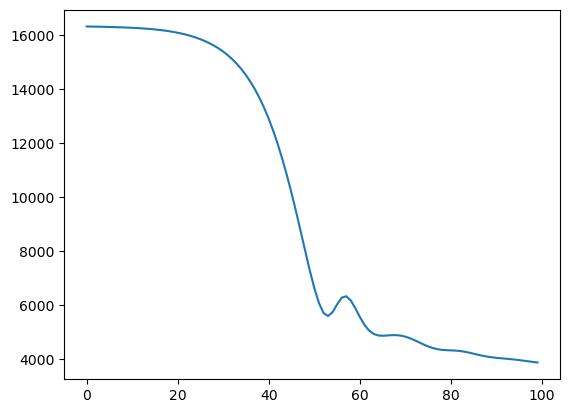

In [64]:
sns.lineplot(y = losses, x = range(epochs))

In [66]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [70]:
mean_squared_error(y_pred_train, y_train)

4028.562181816996

In [71]:
mean_squared_error(y_pred_test, y_test)

4181.631705634527

In [75]:
model_1000 = Model(epochs = 1000)

In [81]:
losses = list(map(lambda x: x.numpy(), losses))

In [77]:
losses, epochs = model_1000.fit(X_train, y_train)

Ephoch 1, Loss: 16328.4619140625
Ephoch 11, Loss: 16237.353515625
Ephoch 21, Loss: 15959.630859375
Ephoch 31, Loss: 14976.0400390625
Ephoch 41, Loss: 11653.6455078125
Ephoch 51, Loss: 5439.27490234375
Ephoch 61, Loss: 4824.79736328125
Ephoch 71, Loss: 4500.333984375
Ephoch 81, Loss: 4104.513671875
Ephoch 91, Loss: 3856.30419921875
Ephoch 101, Loss: 3705.333251953125
Ephoch 111, Loss: 3597.51416015625
Ephoch 121, Loss: 3511.680908203125
Ephoch 131, Loss: 3439.666748046875
Ephoch 141, Loss: 3375.52978515625
Ephoch 151, Loss: 3315.874755859375
Ephoch 161, Loss: 3258.145751953125
Ephoch 171, Loss: 3198.876220703125
Ephoch 181, Loss: 3140.952880859375
Ephoch 191, Loss: 3086.109619140625
Ephoch 201, Loss: 3034.144775390625
Ephoch 211, Loss: 2987.472412109375
Ephoch 221, Loss: 2950.091552734375
Ephoch 231, Loss: 2922.711181640625
Ephoch 241, Loss: 2903.98095703125
Ephoch 251, Loss: 2891.5087890625
Ephoch 261, Loss: 2882.898681640625
Ephoch 271, Loss: 2876.671875
Ephoch 281, Loss: 2871.9919433

<Axes: >

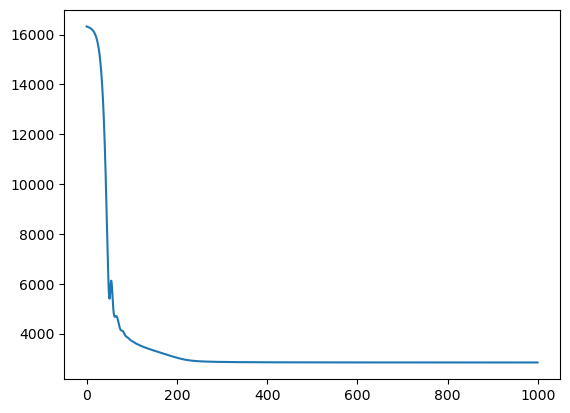

In [80]:

sns.lineplot(x = range(epochs), y = losses)

In [82]:
y_pred_train_1000 = model.predict(X_train)
y_pred_test_1000 = model.predict(X_test)

In [83]:
mean_squared_error(y_pred_train_1000, y_train), mean_squared_error(y_pred_test_1000, y_test)

(4028.562181816996, 4181.631705634527)

In [94]:
model_f = Model(epochs = 500, num_layers = 128, num_units = 64)

In [95]:
losses, epochs = model_f.fit(X_train, y_train)

Ephoch 1, Loss: 16326.544921875
Ephoch 11, Loss: 10302.724609375
Ephoch 21, Loss: 13410.16015625
Ephoch 31, Loss: 13381.296875
Ephoch 41, Loss: 16066.8291015625
Ephoch 51, Loss: 16085.3134765625
Ephoch 61, Loss: 16062.2451171875
Ephoch 71, Loss: 15133.7568359375
Ephoch 81, Loss: 14036.9697265625
Ephoch 91, Loss: 11526.2421875
Ephoch 101, Loss: 3212.961669921875
Ephoch 111, Loss: 2996.328125
Ephoch 121, Loss: 2917.1591796875
Ephoch 131, Loss: 2874.4091796875
Ephoch 141, Loss: 2879.552490234375
Ephoch 151, Loss: 2847.5458984375
Ephoch 161, Loss: 2852.445068359375
Ephoch 171, Loss: 2845.885498046875
Ephoch 181, Loss: 2845.373046875
Ephoch 191, Loss: 2846.98974609375
Ephoch 201, Loss: 2852.944091796875
Ephoch 211, Loss: 2861.465087890625
Ephoch 221, Loss: 2857.546630859375
Ephoch 231, Loss: 2850.226806640625
Ephoch 241, Loss: 2847.41796875
Ephoch 251, Loss: 2846.984130859375
Ephoch 261, Loss: 2847.80810546875
Ephoch 271, Loss: 2848.234130859375
Ephoch 281, Loss: 2845.6669921875
Ephoch 291,

In [97]:
model_ff = Model(epochs = 300, num_layers = 128, num_units = 64, learning_rate = 0.01)

In [98]:
losses, epochs = model_ff.fit(X_train, y_train)

Ephoch 1, Loss: 16326.544921875
Ephoch 11, Loss: 16271.7265625
Ephoch 21, Loss: 7998.75146484375
Ephoch 31, Loss: 3063.89697265625
Ephoch 41, Loss: 3413.93603515625
Ephoch 51, Loss: 3560.014892578125
Ephoch 61, Loss: 3608.119873046875
Ephoch 71, Loss: 3599.896240234375
Ephoch 81, Loss: 3580.734619140625
Ephoch 91, Loss: 3525.656494140625
Ephoch 101, Loss: 3473.93798828125
Ephoch 111, Loss: 3425.889892578125
Ephoch 121, Loss: 3387.65673828125
Ephoch 131, Loss: 3409.619140625
Ephoch 141, Loss: 3350.835205078125
Ephoch 151, Loss: 3339.188720703125
Ephoch 161, Loss: 3263.902099609375
Ephoch 171, Loss: 3238.827392578125
Ephoch 181, Loss: 3363.835205078125
Ephoch 191, Loss: 3301.1943359375
Ephoch 201, Loss: 3220.8408203125
Ephoch 211, Loss: 3186.765380859375
Ephoch 221, Loss: 3167.8076171875
Ephoch 231, Loss: 3158.109375
Ephoch 241, Loss: 3152.705322265625
Ephoch 251, Loss: 3143.662841796875
Ephoch 261, Loss: 3139.710205078125
Ephoch 271, Loss: 3122.404541015625
Ephoch 281, Loss: 3115.489501

In [103]:
model_fff = Model(epochs = 500, num_layers = 128, num_units = 128, learning_rate = 0.001)

In [104]:
model_fff.fit(X_train, y_train)

Ephoch 1, Loss: 16326.544921875
Ephoch 11, Loss: 15481.93359375
Ephoch 21, Loss: 16191.3701171875
Ephoch 31, Loss: 16239.306640625
Ephoch 41, Loss: 15487.0498046875
Ephoch 51, Loss: 15994.083984375
Ephoch 61, Loss: 6668.61572265625
Ephoch 71, Loss: 4706.88037109375
Ephoch 81, Loss: 3986.208740234375
Ephoch 91, Loss: 3743.058349609375
Ephoch 101, Loss: 3543.166748046875
Ephoch 111, Loss: 3355.038330078125
Ephoch 121, Loss: 3277.943359375
Ephoch 131, Loss: 3227.393798828125
Ephoch 141, Loss: 3156.436767578125
Ephoch 151, Loss: 3155.300537109375
Ephoch 161, Loss: 3344.39453125
Ephoch 171, Loss: 3127.07568359375
Ephoch 181, Loss: 3100.850341796875
Ephoch 191, Loss: 3099.07568359375
Ephoch 201, Loss: 3125.211181640625
Ephoch 211, Loss: 3123.00732421875
Ephoch 221, Loss: 3134.40966796875
Ephoch 231, Loss: 3141.43701171875
Ephoch 241, Loss: 3147.492919921875
Ephoch 251, Loss: 3164.044189453125
Ephoch 261, Loss: 3166.77734375
Ephoch 271, Loss: 3170.01171875
Ephoch 281, Loss: 3176.66357421875
E

([<tf.Tensor: shape=(), dtype=float32, numpy=16326.545>,
  <tf.Tensor: shape=(), dtype=float32, numpy=16323.231>,
  <tf.Tensor: shape=(), dtype=float32, numpy=16317.688>,
  <tf.Tensor: shape=(), dtype=float32, numpy=16308.67>,
  <tf.Tensor: shape=(), dtype=float32, numpy=16288.334>,
  <tf.Tensor: shape=(), dtype=float32, numpy=16202.292>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15043.751>,
  <tf.Tensor: shape=(), dtype=float32, numpy=11910.768>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15312.77>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15409.147>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15481.934>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15532.914>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15565.506>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15583.248>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15588.585>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15582.182>,
  <tf.Tensor: shape=(), dtype=float32, numpy=15563.122>,
  <tf.Tensor: shape=(), dtype=flo

In [164]:
model_final = Model(learning_rate = 0.01, num_layers = 16, num_units = 32, epochs = 300)

In [165]:
losses, epochs = model_final.fit(X_train, y_train)

In [166]:
losses = list(map(lambda x: x.numpy(), losses))

<Axes: >

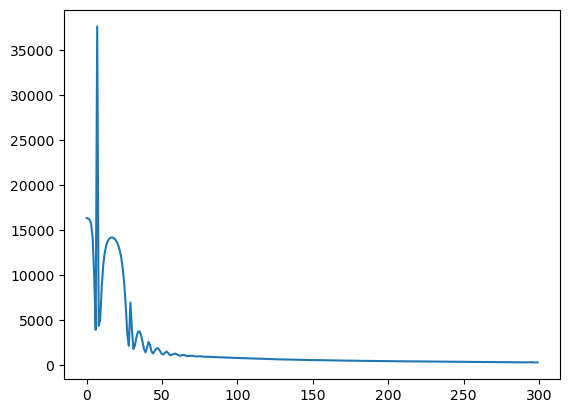

In [167]:
sns.lineplot(x = range(epochs), y = losses)

In [168]:
y_pred_train = model_final.predict(X_train)

In [169]:
y_pred_test = model_final.predict(X_test)

In [170]:
train_rmse = np.sqrt(mean_squared_error(y_pred_train, y_train))

In [171]:
test_rmse = np.sqrt(mean_squared_error(y_pred_test, y_test))

In [172]:
print(f'Train Error: { train_rmse }')
print(f'Test Error: { test_rmse }')

Train Error: 16.78869922921629
Test Error: 26.412273264503536


<Axes: >

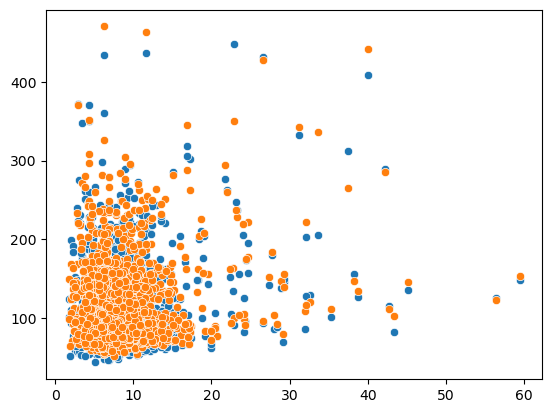

In [173]:
sns.scatterplot(x = X_train[:, 2], y = y_train)
sns.scatterplot(x = X_train[:, 2], y = y_pred_train.ravel())




In [174]:
y_pred_train

array([[ 84.2522  ],
       [ 78.45618 ],
       [ 72.26296 ],
       ...,
       [118.174164],
       [237.44632 ],
       [121.22383 ]], dtype=float32)

In [175]:
y_train.reshape(-1, 1)

array([[ 79.],
       [ 72.],
       [ 80.],
       ...,
       [113.],
       [212.],
       [127.]])

In [152]:
y_train

array([ 79.,  72.,  80., ..., 113., 212., 127.])